# 嵌入层 nn.Embedding() 代码示例

> 引导文章：[g. 嵌入层 nn.Embedding() 详解和要点提醒（PyTorch）](https://github.com/Hoper-J/AI-Guide-and-Demos-zh_CN/blob/master/Guide/g.%20嵌入层%20nn.Embedding()%20详解和要点提醒（PyTorch）.md)

在线链接：[Kaggle](https://www.kaggle.com/code/aidemos/20-nn-embedding) | [Colab](https://colab.research.google.com/drive/1BLgmxasxOD1HQGrI0L1sPlYG40iba9SY?usp=sharing)

> `torch.nn.Embedding(num_embeddings, embedding_dim, padding_idx=None, max_norm=None, norm_type=2.0, scale_grad_by_freq=False, sparse=False, _weight=None, _freeze=False, device=None, dtype=None)`
>
> A simple lookup table that stores embeddings of a fixed dictionary and size.
>
> 一个简单的查找表，用于存储固定大小的字典中每个词的嵌入向量。

### 参数

- **num_embeddings** (int): 嵌入字典的大小，即词汇表的大小 (vocab size)。
- **embedding_dim** (int): 每个嵌入向量的维度大小。
- **padding_idx** (int, 可选): 指定填充（`<PAD>`）对应的索引值。`padding_idx` 对应的嵌入向量在训练过程中不会更新，即梯度不参与反向传播。对于新构建的 `Embedding`，`padding_idx` 处的嵌入向量默认为全零，但可以手动更新为其他值。
- **max_norm** (float, 可选):  如果设置，嵌入向量的范数超过此值时将被重新归一化，使其范数等于 `max_norm`。
- **norm_type** (float, 可选): 用于计算 `max_norm` 的 p-范数，默认为 2，即计算 2 范数。
- **scale_grad_by_freq** (bool, 可选): 如果为 `True`，梯度将根据单词在 mini-batch 中的频率的倒数进行缩放，适用于高频词的梯度调整。默认为 `False`。
- **sparse** (bool, 可选): 如果设置为 `True`，则权重矩阵的梯度为稀疏张量，适合大规模词汇表的内存优化。

### 属性

- **weight** (Tensor): 模块的可学习权重，形状为 `(num_embeddings, embedding_dim)`，初始值从正态分布 `N(0, 1)` 中采样。

### 方法

> `from_pretrained(embeddings, freeze=True, padding_idx=None, max_norm=None, norm_type=2.0, scale_grad_by_freq=False, sparse=False)`
>
> Create Embedding instance from given 2-dimensional FloatTensor.
>
> 用于从给定的 2 维浮点张量（FloatTensor）创建一个 `Embedding` 实例，通俗来讲就是自定义二维的权重矩阵。

#### 参数

- **embeddings** (Tensor): 一个包含嵌入权重的 `FloatTensor`。第一个维度代表 `num_embeddings`（词汇表大小，vocab_size），第二个维度代表 `embedding_dim`（嵌入向量维度）。
- **freeze** (bool, 可选): 如果为 `True`，则嵌入矩阵在训练过程中保持不变，相当于设置 `embedding.weight.requires_grad = False`。默认值为 `True`。
- 其余参数参考之前定义。

## 数学公式

假设词汇表大小为 $V$，嵌入维度为 $D$，则嵌入层可以表示为一个矩阵 $E \in \mathbb{R}^{V \times D}$。

给定一个输入的 token ID 序列 $\{x_1, x_2, \dots, x_n\}$，嵌入层的输出为对应的嵌入向量序列 $\{E_{x_1}, E_{x_2}, \dots, E_{x_n}\}$，其中每个 $E_{x_i} \in \mathbb{R}^D$。

嵌入层接受 $x_i$ 作为输入，返回对应的行向量，公式如下：

$$
E(x_i) = E_{x_i}
$$
其中，$E$ 是嵌入矩阵，$x_i$ 是输入的 token ID，$E(x_i)$ 是对应的嵌入向量。

## 使用示例


In [1]:
import torch
import torch.nn as nn

# 设置随机种子以确保结果可复现
torch.manual_seed(42)

# 定义嵌入层参数
num_embeddings = 5  # 假设词汇表中有 5 个 token
embedding_dim = 3   # 每个 token 对应 3 维嵌入向量

# 初始化嵌入层
embedding = nn.Embedding(num_embeddings, embedding_dim)

# 定义整数索引
input_indices = torch.tensor([0, 2, 4])

# 查找嵌入向量
output = embedding(input_indices)

# 打印结果
print("权重矩阵：")
print(embedding.weight.data)
print("\nEmbedding 输出：")
print(output)


权重矩阵：
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617],
        [ 0.2674,  0.5349,  0.8094],
        [ 1.1103, -1.6898, -0.9890]])

Embedding 输出：
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 2.2082, -0.6380,  0.4617],
        [ 1.1103, -1.6898, -0.9890]], grad_fn=<EmbeddingBackward0>)


## `padding_idx` 的作用

In [2]:
import torch
import torch.nn as nn

# 定义嵌入层，指定 padding_idx=0
embedding = nn.Embedding(num_embeddings=5, embedding_dim=3, padding_idx=0)

# 打印权重矩阵
print("权重矩阵：")
print(embedding.weight.data)

权重矩阵：
tensor([[ 0.0000,  0.0000,  0.0000],
        [-0.7658, -0.7506,  1.3525],
        [ 0.6863, -0.3278,  0.7950],
        [ 0.2815,  0.0562,  0.5227],
        [-0.2384, -0.0499,  0.5263]])


**验证 `padding_idx` 对应的嵌入是否在训练过程中保持不变**：


In [3]:
import torch
import torch.optim as optim

# 注意之前设置了 padding_idx=0
input_indices = torch.tensor([0, 2, 4])

# 定义一个简单的损失函数
loss_fn = nn.MSELoss()

# 目标值
target = torch.randn(3, 3)

# 定义优化器
optimizer = optim.SGD(embedding.parameters(), lr=0.1)

# 清空之前的梯度
optimizer.zero_grad()

# 前向传播
output = embedding(input_indices)

# 计算损失
loss = loss_fn(output, target)

# 反向传播，注意此时不会更新权重
loss.backward()

# 查看梯度
print("梯度：")
print(embedding.weight.grad)

# 打印原权重矩阵
print("原权重矩阵：")
print(embedding.weight.data)

# 更新权重
optimizer.step()

# 打印权重矩阵更新后
print("权重矩阵更新后:")
print(embedding.weight.data)

梯度：
tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [-0.0395,  0.1529,  0.3742],
        [ 0.0000,  0.0000,  0.0000],
        [-0.0863,  0.0353,  0.2030]])
原权重矩阵：
tensor([[ 0.0000,  0.0000,  0.0000],
        [-0.7658, -0.7506,  1.3525],
        [ 0.6863, -0.3278,  0.7950],
        [ 0.2815,  0.0562,  0.5227],
        [-0.2384, -0.0499,  0.5263]])
权重矩阵更新后:
tensor([[ 0.0000,  0.0000,  0.0000],
        [-0.7658, -0.7506,  1.3525],
        [ 0.6903, -0.3430,  0.7576],
        [ 0.2815,  0.0562,  0.5227],
        [-0.2297, -0.0534,  0.5060]])


## 使用预训练的嵌入向量
有时候，我们希望使用预训练的嵌入（如 GloVe、Word2Vec）来初始化嵌入层。这时候可以使用 `from_pretrained` 方法：

In [4]:
import torch
import torch.nn as nn

# 设置随机种子以确保结果可复现
torch.manual_seed(42)

# 假设我们有一个预训练的嵌入矩阵，这里只是随机初始化
pretrained_embeddings = torch.tensor(torch.randn(5, 3))

# 使用 from_pretrained 方法创建嵌入层，不冻结权重层（默认冻结）
embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=False)

# 查看权重矩阵
print("权重矩阵：")
print(embedding.weight.data)

权重矩阵：
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617],
        [ 0.2674,  0.5349,  0.8094],
        [ 1.1103, -1.6898, -0.9890]])


/tmp/ipykernel_194008/4236655584.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pretrained_embeddings = torch.tensor(torch.randn(5, 3))


现在设置一下 `padding_idx`：

In [5]:
embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=False, padding_idx=0)

# 查看权重矩阵
print("权重矩阵：")
print(embedding.weight.data)

权重矩阵：
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617],
        [ 0.2674,  0.5349,  0.8094],
        [ 1.1103, -1.6898, -0.9890]])


**注意**：虽然指定了 `padding_idx=0`，但预训练的嵌入矩阵第 0 行不会自动变为零向量。

## 可视化

### 环境配置

假设已经安装好了 PyTorch

In [6]:
!pip install transformers scikit-learn matplotlib seaborn

### 完整代码

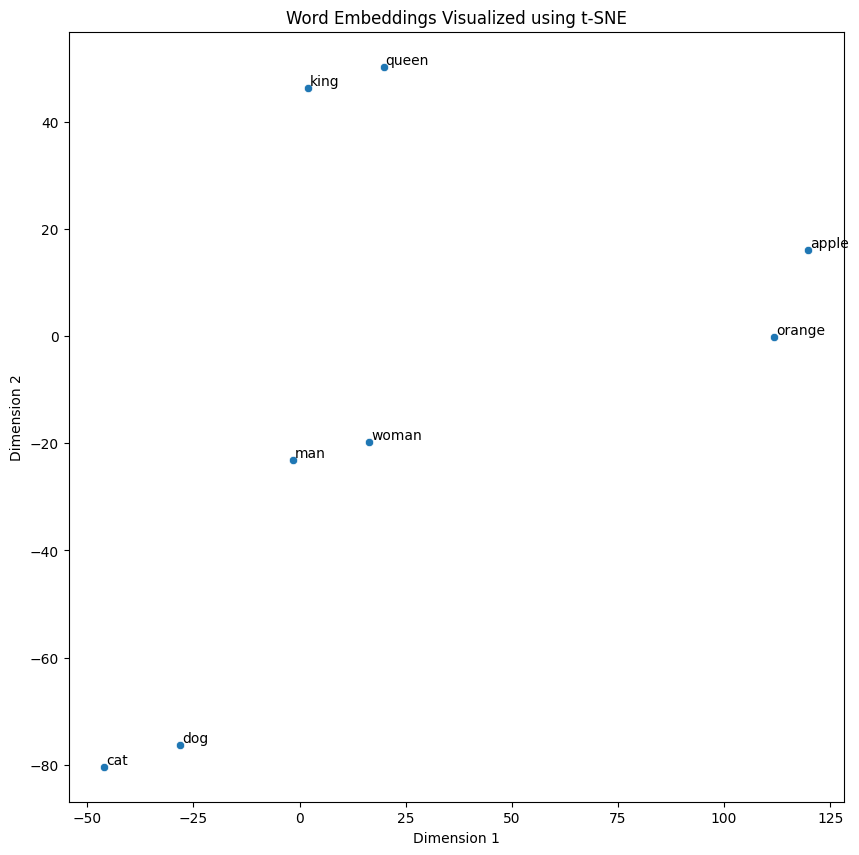

In [7]:
import torch
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE

# 选择预训练的 BERT 模型
model_name = 'bert-base-uncased'  # 对于中文模型，可使用 'bert-base-chinese'

# 加载分词器和模型
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 要可视化的词语列表
words = ['cat', 'dog', 'apple', 'orange', 'king', 'queen', 'man', 'woman']
# words = ['猫', '狗', '苹果', '橙子', '国王', '王后', '男人', '女人']

def get_input_embeddings(tokenizer, model, words):
    # 获取词表中的索引
    word_ids = [tokenizer.convert_tokens_to_ids(word) for word in words]
    # 从嵌入层提取对应的向量
    embeddings = model.embeddings.word_embeddings.weight[word_ids]
    return embeddings.detach().numpy()

def get_output_embeddings(tokenizer, model, words):
    embeddings = []
    for word in words:
        inputs = tokenizer(word, return_tensors='pt')
        outputs = model(**inputs)
        # 获取 [CLS] 向量
        cls_embedding = outputs.last_hidden_state[0][0]  # [CLS] 的向量
        embeddings.append(cls_embedding.detach().numpy())
    return np.array(embeddings)
    
# 获取输入嵌入向量
embeddings = get_input_embeddings(tokenizer, model, words)

# 降维处理
tsne = TSNE(n_components=2, perplexity=2, n_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# 可视化
plt.figure(figsize=(10, 10))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1])

for i, word in enumerate(words):
    plt.text(embeddings_2d[i, 0]+0.5, embeddings_2d[i, 1]+0.5, word)

plt.title('Word Embeddings Visualized using t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()